Paul O'Leary

Comp 4448

Mini-Project from Assignment 4 - KNN

July 26, 2021

In [1]:
# Load some standard libraries.  I will load other libraries as necessary.

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Question 3.

Find your own dataset suitable for classification or regression with at least three input variables and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting unique dataset that is not popularly used in the internet. 

George's Spotify analysis.  

George McIntire posted an attempt to build a classifier that can predict whether or not he likes a song.  Based on data available via Spotify's API, and George's classification of "1" - he liked the song, or "0" - he did not like a song, could the data available accurately predict if he would like future songs or not.  Only the data was downloaded for the following analysis.

Can Spotify's API available data predict whether George will like a song?

Data available:  https://www.kaggle.com/geomack/spotifyclassification?select=data.csv

This is interesting to me for this little mini-project, and I may attempt to work more on this for the Class Project, using the API to pull music meaningful to me.  



a)	State your research question 


Can Spotify's API available data predict whether George will like a song?


b)	Data pre-processing (to the extent deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale). 

In [50]:
# Get the data:

data = pd.read_csv("George_spot_data.csv")

In [51]:
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [52]:
# I will use danceability, energy, liveness and tempo 
# to try to predict the MODE - 0 for George doesn't like, and 1 for George likes.

In [53]:
# Pull out the columns I am interested in for this analysis.
spot_data = data[["danceability", "energy", "liveness", "tempo", "mode"]]
spot_data

,danceability,energy,liveness,tempo,mode
0,0.833,0.434,0.1650,150.062,1
1,0.743,0.359,0.1370,160.083,1
2,0.838,0.412,0.1590,75.044,1
3,0.494,0.338,0.0922,86.468,1
4,0.678,0.561,0.4390,174.004,0
...,...,...,...,...,...
2012,0.584,0.932,0.1290,74.976,1
2013,0.894,0.892,0.0528,110.041,1
2014,0.637,0.935,0.2140,150.082,1
2015,0.557,0.992,0.0913,150.011,1


In [54]:
spot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  2017 non-null   float64
 1   energy        2017 non-null   float64
 2   liveness      2017 non-null   float64
 3   tempo         2017 non-null   float64
 4   mode          2017 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.9 KB


In [55]:
spot_data.describe()

,danceability,energy,liveness,tempo,mode
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.618422,0.681577,0.190844,121.603272,0.612295
std,0.161029,0.210273,0.155453,26.685604,0.487347
min,0.122000,0.014800,0.018800,47.859000,0.000000
25%,0.514000,0.563000,0.092300,100.189000,0.000000
50%,0.631000,0.715000,0.127000,121.427000,1.000000
75%,0.738000,0.846000,0.247000,137.849000,1.000000
max,0.984000,0.998000,0.969000,219.331000,1.000000


In [56]:
# All but Tempo already range from near 0 to near 1.  I'll scale tempo.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

spot_data[['tempo']] = scaler.fit_transform(spot_data[['tempo']])

<ipython-input-56-0b56a9ff459a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_data[['tempo']] = scaler.fit_transform(spot_data[['tempo']])
/Users/pauloleary/opt/miniconda3/envs/dst2_env/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [57]:
# Warning notwithstanding, the data is scaled.

spot_data

,danceability,energy,liveness,tempo,mode
0,0.833,0.434,0.1650,0.596033,1
1,0.743,0.359,0.1370,0.654474,1
2,0.838,0.412,0.1590,0.158539,1
3,0.494,0.338,0.0922,0.225162,1
4,0.678,0.561,0.4390,0.735659,0
...,...,...,...,...,...
2012,0.584,0.932,0.1290,0.158142,1
2013,0.894,0.892,0.0528,0.362636,1
2014,0.637,0.935,0.2140,0.596150,1
2015,0.557,0.992,0.0913,0.595736,1


c)	Data splitting 

In [58]:
# Perform the usual to split the data into train and test sets.

from sklearn.model_selection import train_test_split

feat = spot_data.drop("mode",axis=1)
targ = spot_data["mode"].copy()

X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=0.3, random_state=42)

d)	Model construction 

In [59]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
# Early return on the accuracy:

from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.5808580858085809

58% is better than a coin flip, but maybe we can do better.

e)	Hyperparameter turning (choose whatever approach your like)

In [62]:
# Try a basic grid search for number of nearest neighbors and the leaf size.

from sklearn.model_selection import GridSearchCV

In [63]:
params = {'n_neighbors':range(1,25), 'leaf_size':range(1,50), "p":[1,2]}
grid = GridSearchCV(estimator=knn, param_grid=params, scoring = "accuracy", cv=8)
grid = grid.fit(X_train, y_train)

print("Optimal: ", grid.best_params_)

Optimal:  {'leaf_size': 1, 'n_neighbors': 19, 'p': 2}


In [64]:
# OK, let's try those params  (p = 2 is a default)

knn = KNeighborsClassifier(n_neighbors = 19, leaf_size = 1, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=19)

In [65]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.5874587458745875

Accuracy only slightly better after a GridSearchCV -  58.7% vs. 58.1%.

In [66]:
grid.score(X_train, y_train)

0.6343019135364989

In [67]:
grid.score(X_test, y_test)

0.5874587458745875

No overfitting happening.

In [68]:
# Can we do any better with cross_val_score?

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
scores = []

for k in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    this_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append([k, this_score.mean()])
    
print(scores)

[[1, 0.5471031864948556], [2, 0.4960992907801418], [3, 0.5520777145140345], [4, 0.5109579462591151], [5, 0.5612626111277594], [6, 0.5421436419938068], [7, 0.5697932274498052], [8, 0.5435520926980322], [9, 0.57544700829088], [10, 0.5605533912696034], [11, 0.573334332234542], [12, 0.5627060233742883], [13, 0.5875137348916192], [14, 0.5726051343522126], [15, 0.5860803116571771], [16, 0.5711916891419438], [17, 0.5839726301068824], [18, 0.5705224253321346], [19, 0.5974528019178904], [20, 0.5846718609529518], [21, 0.6031065827589651], [22, 0.5839626410947958], [23, 0.5939067026271101], [24, 0.5917890320647288]]


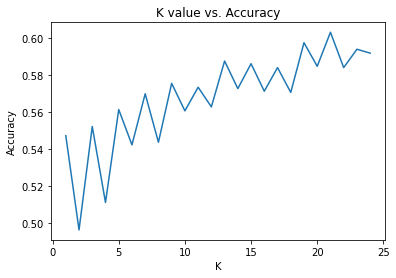

In [71]:
df_results = pd.DataFrame(scores, columns = ['K', 'Accuracy'])

sns.lineplot(x='K', y='Accuracy', data=df_results).set(title="K value vs. Accuracy");

This looks like 21 returns the highest Accuracy.  Try that:

In [72]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [73]:
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.6039603960396039

And again, slightly better, at 60.4%.

Tuning the Hyperparameters for this particular set of George's data made small improvements in the performance of the model.  Additional variables available in the data may affect the results, as might different modeling techniques.

Beyond the scope of this "mini" project, I would investigate other classification techniques to determine if other models would perform better, or if "liking" a song is difficult to equate to some numerical measures.  (My belief is that opinions about music are far too subjective to be pinned down so simply.)